In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from metrics_toolbox import EvaluatorBuilder
import numpy as np

## 1. Multivariate Regression

In [2]:
# Load California housing dataset and create multi-output regression
X, y = fetch_california_housing(return_X_y=True)

# Down sample for testing
X = X[:2000]
y = y[:2000]

# Create two targets: original house value and a synthetic derived target for demonstration
y_multi = np.column_stack([y, y * 0.8 + np.random.randn(len(y)) * 0.5])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.3, random_state=42)


print(f"Training set size: {X_train.shape}")
print(f"Target 1 range: [{y_train[:, 1].min():.2f}, {y_train[:, 1].max():.2f}]")
print(f"Test set size: {X_test.shape}")
print(f"Target 0 range: [{y_train[:, 0].min():.2f}, {y_train[:, 0].max():.2f}]")
print(f"Number of targets: {y_train.shape[1]}")

Training set size: (1400, 8)
Target 1 range: [-0.81, 5.51]
Test set size: (600, 8)
Target 0 range: [0.38, 5.00]
Number of targets: 2


## Train a Regression Model

In [3]:
# Train Ridge regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model = model.fit(X_train, y_train)

## Build Evaluator with Regression Metrics

In [4]:
# Build evaluator with regression metrics for multiple targets
evaluator = (
    EvaluatorBuilder()
    .add_metric("mse_target", target_name="house_value", reducers=["mean", "std"])
    .add_metric("rmse_target", target_name="house_value", reducers=["mean", "min", "max"])
    .add_metric("mse_target", target_name="derived_target", reducers=["mean", "std"])
    .add_metric("rmse_target", target_name="derived_target", reducers=["mean", "min", "max"])
    .add_metric("rmse_macro")
    .add_metric("mse_macro")
).build()

## Evaluate Model

In [5]:
# Evaluate on test set
evaluator.add_model_evaluation(model, X_test, y_test, column_names=["house_value", "derived_target"])

# Evaluate on training set
evaluator.add_model_evaluation(model, X_train, y_train, column_names=["house_value", "derived_target"])

## View Results

In [6]:
# Get results
result = evaluator.get_results()

# Display metric values
print("Metric Values:")
display(result['values'])

# Display steps/evaluations
print("\nEvaluation Steps:")
display(result['steps'])

print("\nPlots:")
display(result['figures'])

Metric Values:


{'mse_house_value_mean': 0.10518792499961742,
 'mse_house_value_std': 0.07882864579296696,
 'rmse_house_value_mean': 0.2956634684702729,
 'rmse_house_value_min': 0.16235541015516067,
 'rmse_house_value_max': 0.42897152678538514,
 'mse_derived_target_mean': 0.21681587649324596,
 'mse_derived_target_std': 0.1605003854610419,
 'rmse_derived_target_mean': 0.4257847979199474,
 'rmse_derived_target_min': 0.2373088515673279,
 'rmse_derived_target_max': 0.6142607442725669,
 'rmse_macro_latest': np.float64(0.1998321308612443),
 'mse_macro_latest': np.float64(0.04133738511942726)}


Evaluation Steps:


{'mse_house_value_steps': [np.float64(0.18401657079258438),
  np.float64(0.02635927920665045)],
 'rmse_house_value_steps': [np.float64(0.42897152678538514),
  np.float64(0.16235541015516067)],
 'mse_derived_target_steps': [np.float64(0.37731626195428786),
  np.float64(0.05631549103220406)],
 'rmse_derived_target_steps': [np.float64(0.6142607442725669),
  np.float64(0.2373088515673279)],
 'rmse_macro_steps': [np.float64(0.521616135528976),
  np.float64(0.1998321308612443)],
 'mse_macro_steps': [np.float64(0.28066641637343615),
  np.float64(0.04133738511942726)]}


Plots:


{'regression_plots': <Figure size 2160x1920 with 8 Axes>}

## Figures
The error is included below the regression lines, by adding padding between the lines.  
Only the lates fold evaluation is used to plot results.

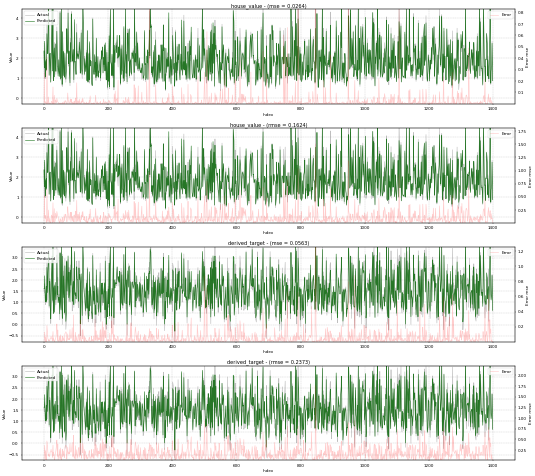

In [7]:
fig = result['figures']['regression_plots']
fig.set_dpi(30)  # Lower DPI for demonstration purposes
fig